In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None

# Data Exploration
- objective: to find trends in data in order to add more features to train a model with

In [2]:
# Read in data
df = pd.read_csv('EPL_Set_clean.csv')
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry City,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,Queens Park,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn Rovers,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Wednesday,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Manchester City,Leeds United,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18


Column Abbreviations:
- Div: Division, unimportant as all matches in this dataset are from the same division (will delete in the next cell)
- Date: Date the match was played
- HomeTeam: The home team (the team hosting the game)
- AwayTeam: The away team (the team travelling to the host's stadium)
- FTHG: Full time home goals (number of goals scored by the home team by full time)
- FTAG: Full time away goals (number of goals scored by the away team by full time)
- FTR: Full time result (H = Home team win, D = Draw, A = Away team win)
- HTHG: Half time home goals (number of goals scored by the home team by half time)
- HTAG: Half time away goals (number of goals scored by the away team by half time)
- HTR: Half time result (H = Home team winning, D = Drawing, A = Away team winning)
- Season: The year the match was played

In [3]:
df.drop(['Div'], axis=1)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry City,0,3,A,NaN,NaN,NaN,1993-94
1,14/08/93,Aston Villa,Queens Park,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/93,Chelsea,Blackburn Rovers,1,2,A,NaN,NaN,NaN,1993-94
3,14/08/93,Liverpool,Sheffield Wednesday,2,0,H,NaN,NaN,NaN,1993-94
4,14/08/93,Manchester City,Leeds United,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...
9659,13/05/18,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,13/05/18,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18
9661,13/05/18,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18
9662,13/05/18,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18


Since complete data is only available from the '95 season onwards, I will be dropping data from the '93-'94 and '94-'95 seasons

In [4]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,19/08/95,Aston Villa,Manchester United,3,1,H,3.0,0.0,H,1995-96
1,E0,19/08/95,Blackburn Rovers,Queens Park,1,0,H,1.0,0.0,H,1995-96
2,E0,19/08/95,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96
3,E0,19/08/95,Liverpool,Sheffield Wednesday,1,0,H,0.0,0.0,D,1995-96
4,E0,19/08/95,Manchester City,Tottenham Hotspur,1,1,D,0.0,1.0,A,1995-96
...,...,...,...,...,...,...,...,...,...,...,...
8735,E0,13/05/18,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18
8736,E0,13/05/18,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18
8737,E0,13/05/18,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18
8738,E0,13/05/18,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18


There is some inconsistency in the data that I have collected as some dates are recorded in the format DD/MM/YYYY, while some are in the format MM/DD/YYYY. Futhermore, some only have two digits to represent the year. To resolve this issue, I will convert all dates to DD/MM/YYYY format.

In [5]:
# convert date to DD/MM/YYYY for consistency
all_dates = []
for date in df['Date']:
    day = date.split('/')[0]
    month = date.split('/')[1]
    year = date.split('/')[2]
    
    #day
    if len(day) == 1:
        day = '0' + day
    
    #month
    if len(month) == 1:
        month = '0' + month
        
    #year
    if len(year)<=2:
        if int(year) > 20:
            year = '19' + year
        else:
            year = '20' + year
    
    full_date = day + '/' + month + '/' + year
    all_dates.append(full_date)

df['Date'] = all_dates

# Create datetime field so I can sort by ascending date
df['DateTime'] =pd.to_datetime(df.Date, dayfirst=True)

df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,DateTime
0,E0,19/08/1995,Aston Villa,Manchester United,3,1,H,3.0,0.0,H,1995-96,1995-08-19
1,E0,19/08/1995,Blackburn Rovers,Queens Park,1,0,H,1.0,0.0,H,1995-96,1995-08-19
2,E0,19/08/1995,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96,1995-08-19
3,E0,19/08/1995,Liverpool,Sheffield Wednesday,1,0,H,0.0,0.0,D,1995-96,1995-08-19
4,E0,19/08/1995,Manchester City,Tottenham Hotspur,1,1,D,0.0,1.0,A,1995-96,1995-08-19
...,...,...,...,...,...,...,...,...,...,...,...,...
8735,E0,13/05/2018,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18,2018-05-13
8736,E0,13/05/2018,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18,2018-05-13
8737,E0,13/05/2018,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18,2018-05-13
8738,E0,13/05/2018,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18,2018-05-13


It is useful to create a set of teams here for graphing (to act as the y axis labels)

In [6]:
team_list = pd.read_csv('teams.csv')

# Create a set of all teams
set_of_teams = []
for team in team_list['Team List']:
    set_of_teams.append(team)

I will now create a new binary feature in the dataframe to mark whether or not a game is in 'best games' list

In [7]:
best_games = pd.read_csv('best_games.csv')
best_games

,teamA,teamB,teamAGoals,teamBGoals,date
0,Chelsea,Tottenham Hotspur,2,2,02/05/2016
1,Newcastle United,Manchester United,5,0,20/10/1996
2,Leicester City,Arsenal,3,3,27/08/1997
3,Newcastle United,Arsenal,4,4,05/02/2011
4,Aston Villa,Manchester United,1,2,23/08/1993
...,...,...,...,...,...
91,Manchester United,Blackburn Rovers,2,3,31/12/2011
92,Blackburn Rovers,Burnley,3,2,18/10/2009
93,Sunderland,Chelsea,4,1,04/12/1999
94,Everton,Liverpool,3,3,23/11/2013


In [8]:
# Create datetime field so I can sort by ascending date
best_games['DateTime'] =pd.to_datetime(best_games.date, dayfirst=True)
best_games = best_games.sort_values(by='DateTime',ascending=True)

# Discard all games before August '95
date_range = best_games['DateTime'] >= '1995-08-01'
best_games = best_games.loc[date_range]

best_games = best_games.reset_index(drop=True)

best_games

,teamA,teamB,teamAGoals,teamBGoals,date,DateTime
0,Liverpool,Newcastle United,4,3,03/04/1996,1996-04-03
1,Manchester City,Liverpool,2,2,05/05/1996,1996-05-05
2,Newcastle United,Manchester United,5,0,20/10/1996,1996-10-20
3,Southampton,Manchester United,6,3,26/10/1996,1996-10-26
4,Newcastle United,Leicester City,4,3,02/02/1997,1997-02-02
...,...,...,...,...,...,...
81,Leicester City,Manchester United,5,3,21/09/2014,2014-09-21
82,Liverpool,Arsenal,3,3,13/01/2016,2016-01-13
83,Norwich City,Liverpool,4,5,23/01/2016,2016-01-23
84,Chelsea,Tottenham Hotspur,2,2,02/05/2016,2016-05-02


In [9]:
#print(best_games.head(10))
#print(df['Date'][1549-926])

i = 0
bg = []
for x in range(len(df)):
    bg.append(0)
df['Best Game'] = bg

for index, row in df.iterrows():
    if i >= len(best_games):
        break
    if best_games['DateTime'][i] - row['DateTime'] < timedelta(weeks=1): #some inconsistency in dates in data
        #print(best_games['date'][i][-7:])
        if row['HomeTeam'] == best_games['teamA'][i] or row['HomeTeam'] == best_games['teamB'][i]:
            if row['AwayTeam'] == best_games['teamA'][i] or row['AwayTeam'] == best_games['teamB'][i]:
                df['Best Game'][index] = 1
                i = i+1
    else:
        row['Best Game'] = 0


target = df['Best Game'] == 1
test = df[target]
print(test)

     Div        Date          HomeTeam           AwayTeam  FTHG  FTAG FTR  \
320   E0  03/04/1996         Liverpool   Newcastle United     4     3   H   
374   E0  04/05/1996   Manchester City          Liverpool     2     2   D   
478   E0  20/10/1996  Newcastle United  Manchester United     5     0   H   
484   E0  26/10/1996       Southampton  Manchester United     6     3   H   
623   E0  02/02/1997  Newcastle United     Leicester City     4     3   H   
...   ..         ...               ...                ...   ...   ...  ..   
7267  E0  21/09/2014    Leicester City  Manchester United     5     3   H   
7804  E0  13/01/2016         Liverpool            Arsenal     3     3   D   
7823  E0  23/01/2016      Norwich City          Liverpool     4     5   A   
7955  E0  02/05/2016           Chelsea  Tottenham Hotspur     2     2   D   
8105  E0  26/11/2016      Swansea City     Crystal Palace     5     4   H   

      HTHG  HTAG HTR   Season   DateTime  Best Game  
320    1.0   2.0   A 

### Hypothesis 1: more popular/successful teams appear in the 'best games' set at higher rates

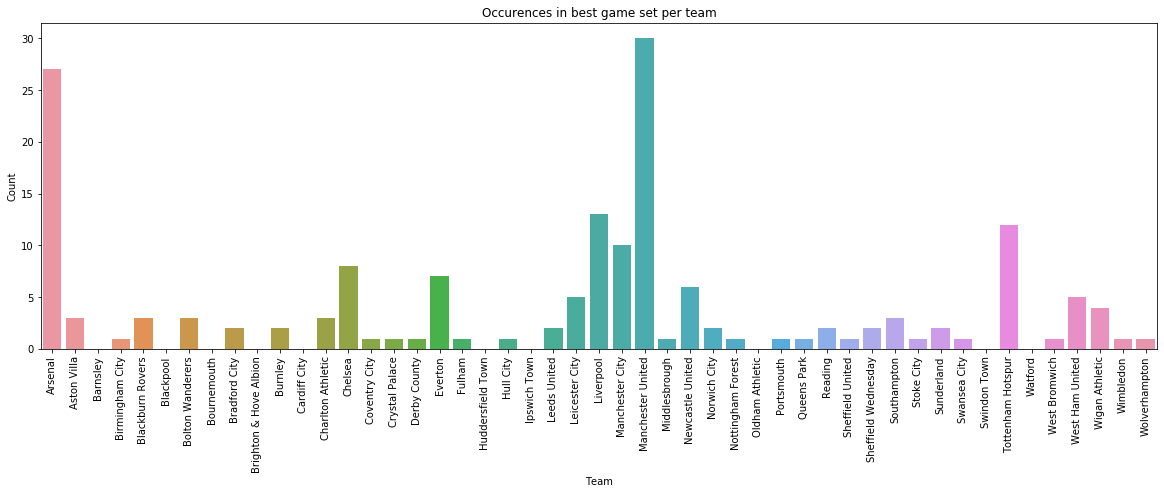

In [10]:
# Find most popular teams
team_count = best_games['teamA'].tolist() + best_games['teamB'].tolist()
count = []
for team in set_of_teams:
    occurences = team_count.count(team)
    count.append(occurences)

# Graph number of times a team is a part of a 'best game'
plt.figure(figsize=(20,6))
plt.title("Occurences in best game set per team")
sns.barplot(x=set_of_teams, y=count)
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()

From the graph above, it seems as though the more popular/successful teams appear in the 'best games' set more often, confirming my hypothesis. The three teams with the highest count - Manchester United, Arsenal, and Liverpool - are three of most successful teams in Premier League history. I believe that this makes sense for the following reasons:
1. More successful teams tend to play in more high-stake games (games that have a large impact on the outcome of that year's premier league title race)
2. More successful teams tend to have higher viewership numbers for their games (more neutrals/rivals watch their games, and they usually have larger fanbases) and thus their games are more likely to remain in the collective memories of football fans for longer
3. More successful teams attract the most skillful players who produce the most highlight reel worthy moments, making their games more memorable
4. More successful teams are more likely to have more years in the premier league (3 teams get relegated to lower league divisions every year) and thus they play more premier league games, increasing their odds of playing in a memorable game

I believe that it would be beneficial to reflect the findings from this hypothesis in the data. I think the best way to represent the popularity/success of the teams playing in each game would be to give each team a score to represent their success in the premier league, and the 'popularity score' of each game would be the sum of the two team's popularity scores. I will make the assumption here that the most successful teams are the most popular, and the metric I will use to determine the popularity score is the total number of points the team has earned in Premier League history (Teams earn 3 points for each match won, 1 for each draw, and 0 for losses). The data will be scraped from [this wikipedia page](https://en.wikipedia.org/wiki/Premier_League_records_and_statistics).

In [11]:
points_total = pd.read_csv('points_history.csv')
print(points_total.head())
print('\n')
print(points_total.tail())

               Teams  Total Points
0  Manchester United          2168
1            Arsenal          1955
2            Chelsea          1931
3          Liverpool          1849
4  Tottenham Hotspur          1595


                Teams  Total Points
44      Bradford City            62
45  Huddersfield Town            53
46          Blackpool            39
47           Barnsley            35
48       Swindon Town            30


In [17]:
# Normalize point totals to (0,1], create dictionary mapping teams to points
max_value = points_total['Total Points'][0]
points_total['Total Points'] = points_total['Total Points']/max_value

points_dict = {}
for index, row in points_total.iterrows():
    points_dict[row['Teams']] = row['Total Points']

In [13]:
# Calculate total 'popularity score' of each game
pop_score = []
for index, game in df.iterrows():
    score = points_dict[game['HomeTeam']] + points_dict[game['AwayTeam']]
    pop_score.append(score)
df['Popularity Score'] = pop_score
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,DateTime,Best Game,Popularity Score
0,E0,19/08/1995,Aston Villa,Manchester United,3,1,H,3.0,0.0,H,1995-96,1995-08-19,0,1.564114
1,E0,19/08/1995,Blackburn Rovers,Queens Park,1,0,H,1.0,0.0,H,1995-96,1995-08-19,0,0.589483
2,E0,19/08/1995,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96,1995-08-19,0,1.548893
3,E0,19/08/1995,Liverpool,Sheffield Wednesday,1,0,H,0.0,0.0,D,1995-96,1995-08-19,0,1.033672
4,E0,19/08/1995,Manchester City,Tottenham Hotspur,1,1,D,0.0,1.0,A,1995-96,1995-08-19,0,1.367159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,E0,13/05/2018,Newcastle United,Chelsea,3,0,H,1.0,0.0,H,2017-18,2018-05-13,0,1.477399
8736,E0,13/05/2018,Southampton,Manchester City,0,1,A,0.0,0.0,D,2017-18,2018-05-13,0,1.059502
8737,E0,13/05/2018,Swansea City,Stoke City,1,2,A,1.0,2.0,A,2017-18,2018-05-13,0,0.354705
8738,E0,13/05/2018,Tottenham Hotspur,Leicester City,5,4,H,1.0,2.0,A,2017-18,2018-05-13,0,1.015683


In [ ]:
box_whisker_1 = sns.boxplot(x="Category", y="Popularity Score", data=tips)

### Hypothesis 2: rival games appear in the 'best games' set at higher rates

A list of premier league rivalries was scraped from [this wikipedia link](https://en.wikipedia.org/wiki/List_of_sports_rivalries_in_the_United_Kingdom) and stored in the file 'rivalries.csv'. I will create a dictionary of each teams rivals (if any) and examine what proportion of the 'best games' set involves rival games.

In [14]:
# create list of list of rivalries
f = open('rivalries.csv','r')
reader = csv.reader(f)
riv = []
for row in reader:
    riv.append(row)

# create dictionary of rivalries (key: team name, value: set of rivals)
rivals = {}
for rival_group in riv:
    for team in rival_group:
        for enemy in rival_group:
            if enemy != team:
                rivals.setdefault(team, set()).add(enemy)
                
# add new binary feature to dataset (0 = not rival game, 1 = rival game)
riv_list = []
for index, row in df.iterrows():
    val = 0
    if row['HomeTeam'] in rivals:
        if row['AwayTeam'] in rivals[row['HomeTeam']]:
            val = 1
    riv_list.append(val)

df['Rival Game'] = riv_list

target = df['Rival Game'] == 1
test = df[target]
print(test)

     Div        Date           HomeTeam                AwayTeam  FTHG  FTAG  \
35    E0  30/08/1995   Newcastle United           Middlesbrough     1     0   
71    E0  30/09/1995            Chelsea                 Arsenal     1     0   
78    E0  01/10/1995  Manchester United               Liverpool     2     2   
85    E0  14/10/1995  Manchester United         Manchester City     1     0   
103   E0  28/10/1995          Liverpool         Manchester City     6     0   
...   ..         ...                ...                     ...   ...   ...   
8678  E0  07/04/2018    Manchester City       Manchester United     2     3   
8685  E0  14/04/2018     Crystal Palace  Brighton & Hove Albion     3     2   
8709  E0  28/04/2018        Southampton             Bournemouth     2     1   
8711  E0  29/04/2018  Manchester United                 Arsenal     2     1   
8722  E0  06/05/2018            Chelsea               Liverpool     1     0   

     FTR  HTHG  HTAG HTR   Season   DateTime  Best 

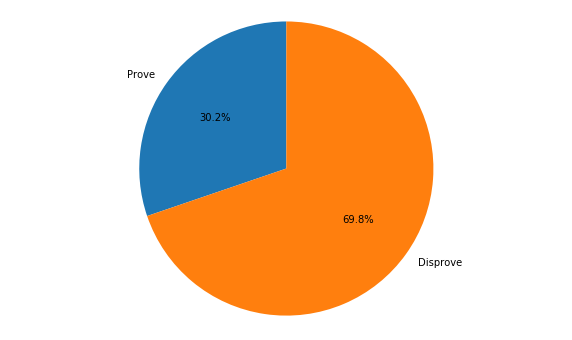

In [15]:
#pie chart of % rivalries
prove = np.logical_and(df['Best Game'] == 1, df['Rival Game'] == 1)
disprove = np.logical_and(df['Best Game'] == 1, df['Rival Game'] == 0)
prove_table = df[prove]
disprove_table = df[disprove]

labels = ['Rival Game', 'Not Rival Game']
values = [len(prove_table), len(disprove_table)]

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

As can be seen from the pie chart above, a majority of the games in the 'Best Games' set are not rival games. This disproves my hypothesis. This may be because when teams play in rival games, there is a lot more to lose (more pride at stake). As a result, teams may play extra cautiously in order not to lose the game. Defensive football rarely results in highlights or memorable plays and as a result the game as a whole is not memorable and not worthy of the 'Best Games' title. However, from personal experience, my favorite matches of all time all involve my favorite team and a fierce rival as it evokes a lot more positive emotions if my team wins. 

### Hypothesis 3: games in which a comeback occurred appear in the 'best games' set at higher rates

### Hypothesis 4: high scoring games appear in the 'best games' set at higher rates

In [16]:
#month game is played in 